# Homework 4:  Linear models

This homework assignment is designed to give you practice with linear models and the bias-variance tradeoff. 

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 


This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`), Flanker Task performance (`Flanker_Unadj`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [2]:
library(tidyverse)

setwd('/Users/jenahblack/Documents/Current_Coursework/Data_Science/Jenah_Homeworks')

data <- read.csv('unrestricted_trimmed_1_7_2020_10_50_44.csv')
head(data)

d1 <- data %>%
    select(Subject, Gender, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol) %>%
    na.omit()
anyNA(d1)
head(d1)


,Subject,Release,Acquisition,Gender,Age,MMSE_Score,PSQI_Score,PSQI_Comp1,PSQI_Comp2,PSQI_Comp3,⋯,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,100004,S900,Q06,M,22-25,29,8,1,2,2,⋯,5.2,101.12,86.45,2,45.9,107.17,105.31,1.80,0,1.80
2,100206,S900,Q11,M,26-30,30,6,1,1,1,⋯,6.0,108.79,97.19,1,49.7,72.63,72.03,1.84,0,1.84
3,100307,Q1,Q01,F,26-30,29,4,1,0,1,⋯,3.6,101.12,86.45,0,38.6,71.69,71.76,1.76,0,1.76
4,100408,Q3,Q03,M,31-35,30,4,1,1,0,⋯,2.0,108.79,98.04,2,52.6,114.01,113.59,1.76,2,1.68
5,100610,S900,Q08,M,26-30,30,4,1,1,0,⋯,2.0,122.25,110.45,0,38.6,84.84,85.31,1.92,1,1.88
6,101006,S500,Q06,F,31-35,28,2,1,1,0,⋯,6.0,122.25,111.41,0,38.6,123.80,123.31,1.80,0,1.80


[1] FALSE

,Subject,Gender,Flanker_Unadj,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<fct>,<dbl>,<int>,<int>
2,100206,M,130.42,543134,807245
3,100307,F,112.56,407292,664124
4,100408,M,121.18,500417,726206
5,100610,M,126.53,512946,762308
6,101006,F,101.85,429449,579632
7,101107,M,107.04,416995,665024


---
## 2. Initial data visualization (2 point)

Use the `pairs` function to look at all the pairwise scatterplots of the variables in `d1`. Describe which variables seem positively correlated, negatively correlated, or not correlated at all.

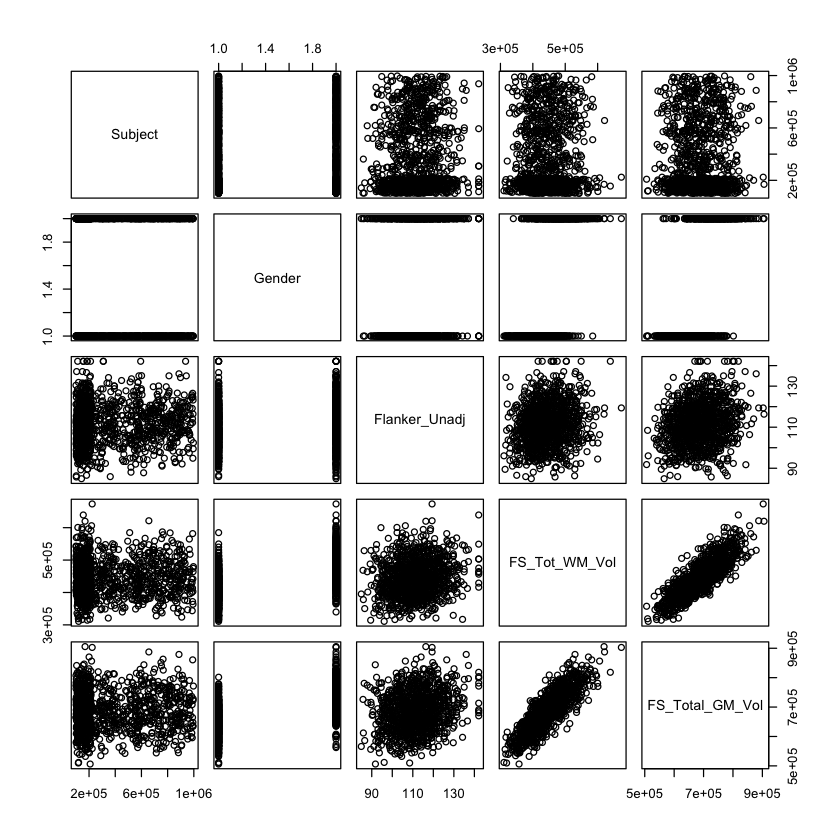

In [3]:
pairs(d1)

> Total white matter and total grey matter are strongly positively correlated. There may also be a positive correlation between total grey matter and performance on the Flanker Task as well as with total white matter and performance on the Flanker Task, although it is unclear just by exmaning the data. Finally, there may be an association between gender and grey and white matter volume. Otherwise there are no obvious correlations between variables.
> 

---
## 3. Linear regression (4 points)

Use the `lm` (linear model) function to determine the association between Flanker Task performance and total grey matter volume from the `d1` data frame.

$$
Y_{flanker} = \beta_0 + \beta_1 X_{GM volume}
$$

Show the results using the `summary` function, and report the mean coefficient values for $beta_0$ \& $\beta_1$ (`coef` function) and their 95\% confidence intervals (`confint` function). Is grey matter volume significantly associated with Flanker Task performance?

In [4]:
# Linear model examining the relationship between total grey matter and performance on the flanker task
model1 <- lm(Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)
summary(model1)

print('Coefficients')
coef(model1)

print('Confidence intervals')
confint(model1, level=0.95)



Call:
lm(formula = Flanker_Unadj ~ FS_Total_GM_Vol, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2280  -6.5969  -0.0119   6.5497  31.0108 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.026e+01  3.041e+00  29.677  < 2e-16 ***
FS_Total_GM_Vol 3.110e-05  4.412e-06   7.048 3.18e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.864 on 1111 degrees of freedom
Multiple R-squared:  0.0428,	Adjusted R-squared:  0.04194 
F-statistic: 49.68 on 1 and 1111 DF,  p-value: 3.177e-12


[1] "Coefficients"


(Intercept) FS_Total_GM_Vol 
   9.025646e+01    3.109965e-05

[1] "Confidence intervals"


,2.5 %,97.5 %
(Intercept),8.428917e+01,9.622375e+01
FS_Total_GM_Vol,2.244198e-05,3.975733e-05


> Yes, grey matter is significantly associated with performance on the flanker task. It appears the greater grey matter volume is related to higher scores on the task (B = .00003, t= 7.048, p < .001). The effect looks to be very small to me, but since I do not know much about the expected size of the effect, it is difficult know how to interpret this. 
> 

---
## 4. Plotting (2 points)

Use `ggplot` to plot the `FS_Total_GM_Vol` variable (x axis) against the `Flanker_Unadj` variable (y axis), as well as the regression line with confidence intervals on the regrssion line. Qualitatively describe what you see. 

`geom_smooth()` using formula 'y ~ x'



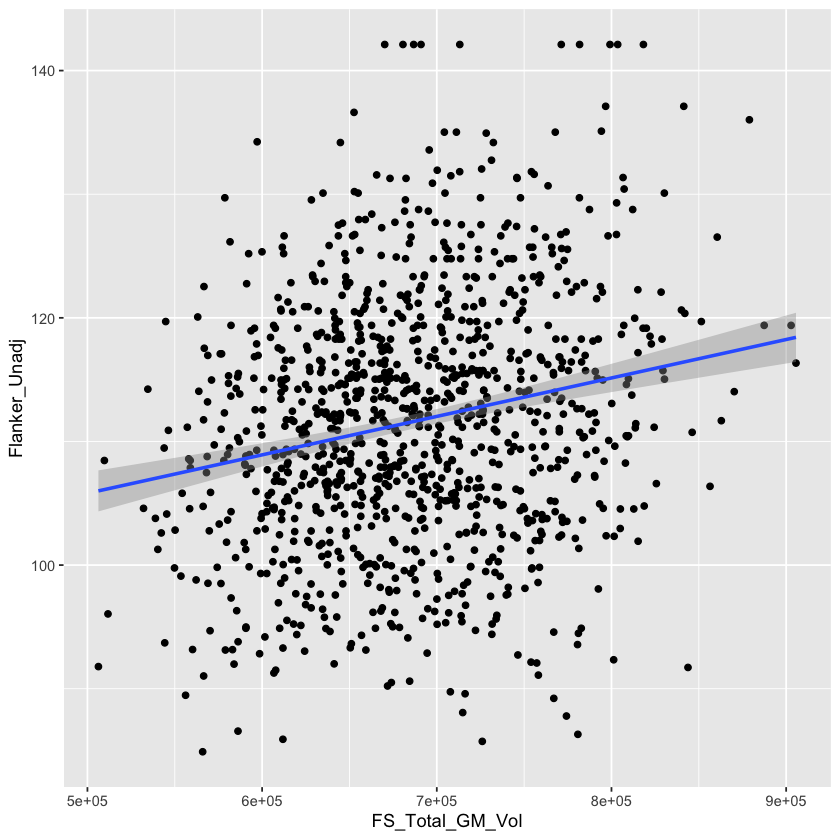

In [5]:
# plot with regression line
model1_plot <- ggplot(data = d1, aes(x = FS_Total_GM_Vol, y = Flanker_Unadj)) +
  geom_point() +
  geom_smooth(method='lm', se=TRUE) #geom_smooth with a linear regression and 95% confidence intervals
model1_plot

> There is a positive association between grey matter volume and performance on the flanker task. This can be seen because the regression line has a positive slope. The confidence intervals widen towards the boundaries of the data, reflecting the sparsity of the data at the endpoints. There is quite a bit of variability in the the response, however. 
> 

---

## 5. Reflection (1 point)

What do you conclude based on the analyses above?

> There appears to be a positive trend between total grey matter volume and performance on the Flanker Task. As grey matter volume increases, performance on the task also increases. This effect was significant in that the coefficient of grey matter volume was positive when regressed against Flanker performance, and its p-value was well below .05. Visually, this effect was apparent when the two variables were plotted together, and the regression line makes the positive relationship clearer.  
> While there appears to be a relationship between Flanker performance and grey matter volume, it would be premature to say they were causally related. Besides the obvious fact that correlation does not imply causation, there also appears to be a possible relationship between white matter volume and Flanker performance. Therefore, it may be the case that those with greater brain volume in general show better performance on the Flanker Task. There are many reasons why this might be the case that have little to do with any special properties of grey matter (e.g., the brain growing larger throughout development). 

**DUE:** 5pm EST, March 4, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> Asal Yunusova